# Cartographie

Utilisation de données cartographiques avec python.

Autre ressources : 

* Un peut pareil mais avec Paris :  https://fxjollois.github.io/cours-2016-2017/analyse-donnees-massives-tp9.html


Pour installer tous les packages avec une installation fraiche de anaconda :

* `conda update --all` 
* `pip install geopy`
* `conda install geopandas` 
* `conda install descartes`

# folium

On va utiliser folium : https://github.com/python-visualization/folium

petit tuto : 
https://python-visualization.github.io/folium/quickstart.html



quelques exemple de cartes : https://python-graph-gallery.com/288-map-background-with-folium/

Pour installer folium, il faut tout d'abord installer.

On peu l'installer via pip : `pip install folium` car conda ne le connait pas.

In [1]:
import folium


m = folium.Map(location=[43.2805, 5.3809],
               #tiles='Stamen Toner',
               zoom_start=11
              )
m

Ajoutons y l'école. Pour cela il faut geodécoder l'adresse (transformer une adresse en coordonnées).

On va utiliser la bibliothèque https://geopy.readthedocs.io/en/stable/

tuto : https://towardsdatascience.com/geocode-with-python-161ec1e62b89

Installer `geopandas` installe également, entre autres, la bibliothèque `geopy`.

Commencez par l'installer via `pip install geopy` ou la forge (voir pour l'instalation de folium en début sujet)

In [2]:
from geopy import Nominatim
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("ecole centrale de marseille, Marseille, France")

print(location)
print(location.latitude, location.longitude)

École centrale de Marseille, Rue Frédéric Joliot Curie, Technopôle de Château-Gombert, Château Gombert, Marseille 13e Arrondissement, Marseille, Bouches-du-Rhône, Provence-Alpes-Côte d'Azur, France métropolitaine, 13013, France
43.34142225 5.437908238640205


In [3]:
folium.Marker(
    [location.latitude, location.longitude],
    popup='ecm'
).add_to(m)

m

Changeons l'icône de l'école. Comme on ne peut pas changer un marker, il faut refaire la carte.

In [4]:
m = folium.Map(location=[43.2805, 5.3809],
               zoom_start=11
              )

Les icônes (https://python-visualization.github.io/folium/modules.html#folium.map.Icon) disponibles sont :

* par défaut (le préfix `'glyphicon'`) celles de bootstrap (en version 3) : https://glyphicons.bootstrapcheatsheets.com/
* celles de la version 4 de fontawesome en changeant le préfix en `'fa'` : https://fontawesome.com/v4.7.0/icons/

In [5]:
folium.Marker(
    [location.latitude, location.longitude],
    icon=folium.Icon(color='beige', prefix="fa", icon='graduation-cap'),
    popup='ecm'
).add_to(m)

m

Ajoutons les arrondissements de Marseille

téchargé de là : https://laprovence.carto.com/tables/arrondissements/public/map#

au format geojson https://geojson.org/

Cene sont plus des coordonnées, mais des polygones. Vous pouvez trouver les différents types de données geojson là : https://fr.wikipedia.org/wiki/GeoJSON

In [6]:
import json

arrondissements = json.load(open('./arrondissements.geojson'))
arrondissements

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[5.396793, 43.212156],
       [5.397125, 43.212396],
       [5.397472, 43.212352],
       [5.397305, 43.212084],
       [5.397083, 43.212046],
       [5.396793, 43.212156]]],
     [[[5.454919, 43.211658],
       [5.455, 43.211756],
       [5.455191, 43.211722],
       [5.455067, 43.211576],
       [5.454919, 43.211658]]],
     [[[5.480904, 43.204753],
       [5.481107, 43.204435],
       [5.481078, 43.204223],
       [5.480913, 43.204518],
       [5.480904, 43.204753]]],
     [[[5.460201, 43.209873],
       [5.460295, 43.210002],
       [5.460483, 43.209887],
       [5.460429, 43.20977],
       [5.460201, 43.209873]]],
     [[[5.455996, 43.210727],
       [5.456162, 43.210759],
       [5.456671, 43.210525],
       [5.457166, 43.210161],
       [5.456902, 43.210154],
       [5.455996, 43.210727]]],
     [[[5.519639, 43.24435],
       [5.519198, 43.241607],
      

In [7]:
folium.GeoJson(
    arrondissements,
    name='geojson',
    tooltip=folium.features.GeoJsonTooltip(fields=['nom',]),
).add_to(m)

folium.LayerControl().add_to(m)

m

### géo spaciales


Openstreetmap connait 3 types de données : 

* les noeuds : `node` : une coordonnée
* les chemins :  `way` : une liste ordonnée de nœuds (une route ou un contours)
* les relations : `relation` : une liste ordonnée de nœuds, de chemains ou d'autres relations.

Certains objets pouvant être décrits comme des chemins ou des relations selon la personne qui a référencé l'objet :
* l'ecm est un chemin : https://www.openstreetmap.org/way/527054532
* le chateau de versailles une relation : https://www.openstreetmap.org/relation/1149002


* http://overpass-turbo.eu/
* wiki osm : https://wiki.openstreetmap.org/wiki/Main_Page
    * https://wiki.openstreetmap.org/wiki/Overpass_API/Overpass_API_by_Example
    
**références** :

* https://towardsdatascience.com/loading-data-from-openstreetmap-with-python-and-the-overpass-api-513882a27fd0
    * tuto pour retreouver des données sur OSM 
    * modèle de données de OSM 
    * overpass API avec les query avec une relation
* wiki osm : https://wiki.openstreetmap.org/wiki/Main_Page
* overpass API : https://wiki.openstreetmap.org/wiki/Overpass_API/Overpass_API_by_Example



### trouver les pizzeria de marseille

On va ajouter toutes les pizzéria de Marseille à notre carte.

#### tests avec overpass turbo

Avant de récupérer nos données directement directement l'API d'openstreetmap, on utilise http://overpass-turbo.eu/ qui nous permet de tester nos requètes.

Pour cela : 
1. allez sur http://overpass-turbo.eu/ 
2. centrez la carte sur Marseille, nos requêtes seront recherchées sur celle-ci. 
3. tapez la la requête suivante :

>`
[out:json][timeout:25];
// gather results
(
  node["cuisine"="pizza"]({{bbox}});
  way["cuisine"="pizza"]({{bbox}});
  relation["cuisine"="pizza"]({{bbox}});
);
// print results
out body;`
>
>` >;
out skel qt;
`

Notre requête cherche tous les noeuds, chemins ou relations qui ont "pizza" comme type de cuisine sur la carte courante (on cherche dans `{{bbox}}`). Pour une liste des différentes features communément utilisées, voir https://wiki.openstreetmap.org/wiki/Map_Features

**Remarque** : On ne prend que ceux ayant mis pizza dans la cuisine. On loupe donc la [meilleure pizzeria de Marseille](https://www.openstreetmap.org/node/513732930). 

Pour automatiser la recherche, il faut que l'on puisse déterminer la portion de carte sur laquelle chercher nos pizzas. Pour cela on peut utiliser : http://norbertrenner.de/osm/bbox.html et chercher la *bounding box* autour de marseille.

exemple : 

>`
( node["cuisine"="pizza"](43.232,5.313,43.382,5.522);
  way["cuisine"="pizza"](43.232,5.313,43.382,5.522);
  rel["cuisine"="pizza"](43.232,5.313,43.382,5.522);
);
`

Tentez d'autres lieux. Y-a-t-il des pizzeria en Islande ? Et à Rome ?

On peut aussi restreindre la recheche à une relation exitante. Pour Marseille on peut par exemple utiliser la relation : https://www.openstreetmap.org/relation/76469. On définit une *area* que l'on utilise ensuite dans la recherche : 

>`
area(3600076469);
( node["cuisine"="pizza"](area);
  way["cuisine"="pizza"](area);
  rel["cuisine"="pizza"](area);
);
`

**Attention** : Il faut ajouter 3600000000 à l'area cr c'est une relation : $3600000000 + 76469 = 3600076469$. Voir https://wiki.openstreetmap.org/wiki/Overpass_API/Overpass_QL#Map_way.2Frelation_to_area_.28map_to_area.29 



#### API overpass

On va effectuer une requête sur un site web, et on va récupérer la réponse. Pour cela, en python on utilise le module [requests](https://requests-fr.readthedocs.io/en/latest/) :

In [8]:
import requests
import json
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area(3600076469);
( node["cuisine"="pizza"](area);
  way["cuisine"="pizza"](area);
  rel["cuisine"="pizza"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})

La réponse est au format json, on la transforme en objet python :

In [9]:
data = response.json()
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.55.9 ab41fea6',
 'osm3s': {'timestamp_osm_base': '2020-01-15T16:03:02Z',
  'timestamp_areas_base': '2020-01-15T15:49:02Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 364622149,
   'lat': 43.2930532,
   'lon': 5.3729519,
   'tags': {'amenity': 'restaurant',
    'cuisine': 'pizza',
    'name': 'Chez Mario'}},
  {'type': 'node',
   'id': 627616768,
   'lat': 43.338386,
   'lon': 5.407488,
   'tags': {'amenity': 'restaurant', 'cuisine': 'pizza', 'name': 'La Grotte'}},
  {'type': 'node',
   'id': 991811853,
   'lat': 43.2930076,
   'lon': 5.3867809,
   'tags': {'amenity': 'pub',
    'cuisine': 'pizza',
    'food': 'yes',
    'name': 'Chez Guy'}},
  {'type': 'node',
   'id': 1250893404,
   'lat': 43.2970084,
   'lon': 5.3717617,
   'tags': {'amenity': 'restaurant',
    'cuisine': 'pizza',
    'name': 'Le joli port'}},
  {'ty

Représentons les différentes coordonnées sur un graphique. Commençons par enregistrer les points dans un dataframe. 

In [10]:
import pandas as pd

In [11]:
pizzerias = pd.DataFrame(data['elements'])
pizzerias

,type,id,lat,lon,tags
0,node,364622149,43.293053,5.372952,"{'amenity': 'restaurant', 'cuisine': 'pizza', ..."
1,node,627616768,43.338386,5.407488,"{'amenity': 'restaurant', 'cuisine': 'pizza', ..."
2,node,991811853,43.293008,5.386781,"{'amenity': 'pub', 'cuisine': 'pizza', 'food':..."
3,node,1250893404,43.297008,5.371762,"{'amenity': 'restaurant', 'cuisine': 'pizza', ..."
4,node,1319273248,43.295558,5.379020,"{'amenity': 'restaurant', 'cuisine': 'pizza', ..."
...,...,...,...,...,...
72,node,6691863718,43.321889,5.380624,"{'amenity': 'restaurant', 'cuisine': 'pizza', ..."
73,node,6700838091,43.288713,5.455550,"{'amenity': 'restaurant', 'covered': 'yes', 'c..."
74,node,7005835113,43.258075,5.403519,"{'amenity': 'fast_food', 'cuisine': 'pizza', '..."
75,node,7005844722,43.264636,5.409664,"{'amenity': 'fast_food', 'cuisine': 'pizza', '..."


Représentons les graphiquement :

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

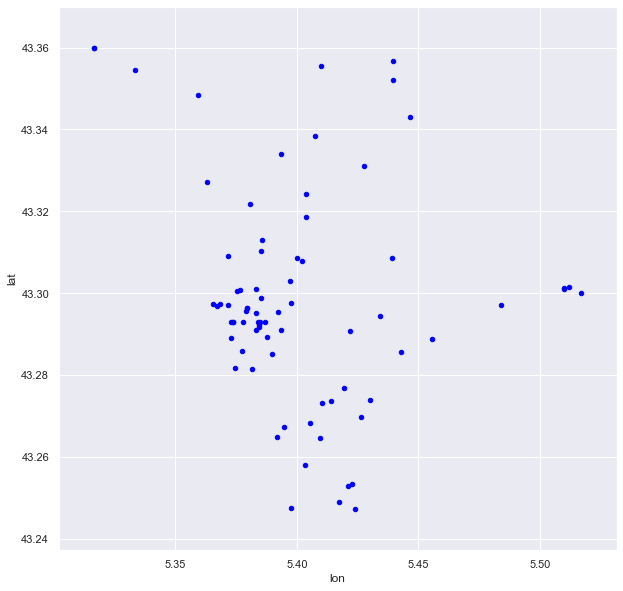

In [13]:
fig, ax = plt.subplots(figsize=(10, 10)) 

pizzerias.plot.scatter('lon', 'lat', color="blue", ax=ax)

plt.show() 

On les ajoute à la carte avec des Markers. Un *hover* sur le marqueur nous donne son nom :

In [14]:
for index, row in pizzerias.iterrows():
    folium.Marker([row['lat'], row['lon']],
                  icon=folium.Icon(color='green', icon='cutlery'),
                  tooltip=folium.features.Tooltip(row['tags'].get('name', 'no name')),
                 ).add_to(m)

m

# geopandas

On veut compter le nombre de pizzeria par arrondissement

## installation

Comme ce sont des données geographique, on utilise géopandas.

Commencez par l'installer via `./conda install geopandas` ou la forge (voir pour l'instalation de folium en début sujet)

In [15]:
import geopandas as gpd

## structures de données

On va transfomrer notre `DataFrame`des pizzerias en `GeoDataFrame` permettant d'utiliser les spécifités géographique. 

**Référence** : 
* https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html#creating-a-geodataframe-from-a-dataframe-with-coordinates


In [16]:
geo_pizzerias = gpd.GeoDataFrame(pizzerias, 
                                 geometry=gpd.points_from_xy(pizzerias.lon, pizzerias.lat))
geo_pizzerias.crs = {'init' :'epsg:4326'}

Lorsque l'on crée des données géographique, il faut référencer le [CRS](https://fr.wikipedia.org/wiki/Syst%C3%A8me_de_coordonn%C3%A9es_(cartographie)) utilisé. Nous avons précisé qu'il s'agissait du [epsg:4326](https://epsg.io/4326), aussi connu sous le le nom de [WGS 84](https://fr.wikipedia.org/wiki/WGS_84), utilisé pour e GPS.

voir : 
* https://medium.com/cr%C3%A9ation-dune-app-cartographique-avec-firebase-vue/comprendre-les-coordinates-reference-system-crs-b67a88bce63c
* http://geopandas.org/projections.html

`geo_pizzerias` a une colonne de plus, nommée `geometry` :

In [17]:
geo_pizzerias

,type,id,lat,lon,tags,geometry
0,node,364622149,43.293053,5.372952,"{'amenity': 'restaurant', 'cuisine': 'pizza', ...",POINT (5.37295 43.29305)
1,node,627616768,43.338386,5.407488,"{'amenity': 'restaurant', 'cuisine': 'pizza', ...",POINT (5.40749 43.33839)
2,node,991811853,43.293008,5.386781,"{'amenity': 'pub', 'cuisine': 'pizza', 'food':...",POINT (5.38678 43.29301)
3,node,1250893404,43.297008,5.371762,"{'amenity': 'restaurant', 'cuisine': 'pizza', ...",POINT (5.37176 43.29701)
4,node,1319273248,43.295558,5.379020,"{'amenity': 'restaurant', 'cuisine': 'pizza', ...",POINT (5.37902 43.29556)
...,...,...,...,...,...,...
72,node,6691863718,43.321889,5.380624,"{'amenity': 'restaurant', 'cuisine': 'pizza', ...",POINT (5.38062 43.32189)
73,node,6700838091,43.288713,5.455550,"{'amenity': 'restaurant', 'covered': 'yes', 'c...",POINT (5.45555 43.28871)
74,node,7005835113,43.258075,5.403519,"{'amenity': 'fast_food', 'cuisine': 'pizza', '...",POINT (5.40352 43.25807)
75,node,7005844722,43.264636,5.409664,"{'amenity': 'fast_food', 'cuisine': 'pizza', '...",POINT (5.40966 43.26464)


## geométries

On peut maintenant représenter graphiquement directement nos points

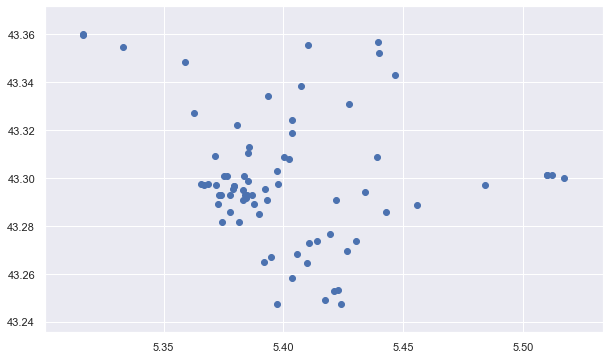

In [18]:
fig, ax = plt.subplots(figsize=(10, 10)) 

geo_pizzerias.plot(ax=ax)

plt.show() 

Calculer des distances entre points et l'ecm (à vol d'oiseau) :

In [19]:
from shapely.geometry import Point

In [20]:
geo_pizzerias.distance(Point(43.2805, 5.3809)).sort_values()

67    53.515691
68    53.520107
50    53.521462
66    53.521468
56    53.537027
        ...    
69    53.643825
34    53.661582
18    53.684260
31    53.699870
32    53.699927
Length: 77, dtype: float64

Compter le nombre de pizzerias par arrondissment :

In [21]:
geo_arrondissements = gpd.read_file(json.dumps(arrondissements))

geo_arrondissements

,cartodb_id,insee,nom,wikipedia,surf_m2,arrondissement,geometry
0,1461,13209,Marseille 9e Arrondissement,fr:9e arrondissement de Marseille,63283053,13009,"MULTIPOLYGON (((5.39679 43.21216, 5.39712 43.2..."
1,1716,13207,Marseille 7e Arrondissement,fr:7e arrondissement de Marseille,5768126,13007,"MULTIPOLYGON (((5.36996 43.26127, 5.37000 43.2..."
2,2597,13208,Marseille 8e Arrondissement,fr:8e arrondissement de Marseille,19440021,13008,"MULTIPOLYGON (((5.36285 43.20715, 5.36311 43.2..."
3,1637,13201,Marseille 1er Arrondissement,fr:1er arrondissement de Marseille,1778220,13001,"MULTIPOLYGON (((5.37219 43.29868, 5.37179 43.2..."
4,1654,13203,Marseille 3e Arrondissement,fr:3e arrondissement de Marseille,2540497,13003,"MULTIPOLYGON (((5.37490 43.30155, 5.37424 43.3..."
5,2576,13205,Marseille 5e Arrondissement,fr:5e arrondissement de Marseille,2185746,13005,"MULTIPOLYGON (((5.38552 43.29431, 5.38633 43.2..."
6,1645,13202,Marseille 2e Arrondissement,fr:2e arrondissement de Marseille,4987243,13002,"MULTIPOLYGON (((5.36912 43.31672, 5.37053 43.3..."
7,1711,13206,Marseille 6e Arrondissement,fr:6e arrondissement de Marseille,2057703,13006,"MULTIPOLYGON (((5.37214 43.29101, 5.38235 43.2..."
8,1753,13210,Marseille 10e Arrondissement,fr:10e arrondissement de Marseille,10782940,13010,"MULTIPOLYGON (((5.41492 43.29169, 5.41653 43.2..."
9,1802,13213,Marseille 13e Arrondissement,fr:13e arrondissement de Marseille,28007422,13013,"MULTIPOLYGON (((5.41534 43.37883, 5.42449 43.3..."


In [22]:
# commençons par joindre les 2 tables par leur élément en commun, la geometry.
# chaque restaurant sera dans son arrondissement

jointure = gpd.sjoin(geo_arrondissements, geo_pizzerias)

jointure

,cartodb_id,insee,nom,wikipedia,surf_m2,arrondissement,geometry,index_right,type,id,lat,lon,tags
0,1461,13209,Marseille 9e Arrondissement,fr:9e arrondissement de Marseille,63283053,13009,"MULTIPOLYGON (((5.39679 43.21216, 5.39712 43.2...",41,node,4227047019,43.247285,5.424096,"{'amenity': 'restaurant', 'cuisine': 'pizza', ..."
0,1461,13209,Marseille 9e Arrondissement,fr:9e arrondissement de Marseille,63283053,13009,"MULTIPOLYGON (((5.39679 43.21216, 5.39712 43.2...",33,node,3790494525,43.247489,5.397381,"{'amenity': 'restaurant', 'contact:website': '..."
0,1461,13209,Marseille 9e Arrondissement,fr:9e arrondissement de Marseille,63283053,13009,"MULTIPOLYGON (((5.39679 43.21216, 5.39712 43.2...",54,node,5139621781,43.248958,5.417403,"{'amenity': 'restaurant', 'cuisine': 'pizza', ..."
0,1461,13209,Marseille 9e Arrondissement,fr:9e arrondissement de Marseille,63283053,13009,"MULTIPOLYGON (((5.39679 43.21216, 5.39712 43.2...",9,node,1796966048,43.252833,5.421149,"{'amenity': 'restaurant', 'cuisine': 'pizza', ..."
0,1461,13209,Marseille 9e Arrondissement,fr:9e arrondissement de Marseille,63283053,13009,"MULTIPOLYGON (((5.39679 43.21216, 5.39712 43.2...",47,node,4580200379,43.253223,5.422757,"{'amenity': 'fast_food', 'cuisine': 'pizza', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,2643,13212,Marseille 12e Arrondissement,fr:12e arrondissement de Marseille,14007071,13012,"MULTIPOLYGON (((5.42579 43.29013, 5.42449 43.2...",71,node,6627597522,43.308706,5.439136,"{'amenity': 'fast_food', 'cuisine': 'pizza', '..."
15,2650,13214,Marseille 14e Arrondissement,fr:14e arrondissement de Marseille,16370343,13014,"MULTIPOLYGON (((5.39153 43.37201, 5.39210 43.3...",72,node,6691863718,43.321889,5.380624,"{'amenity': 'restaurant', 'cuisine': 'pizza', ..."
15,2650,13214,Marseille 14e Arrondissement,fr:14e arrondissement de Marseille,16370343,13014,"MULTIPOLYGON (((5.39153 43.37201, 5.39210 43.3...",76,node,7010879902,43.334021,5.393441,"{'addr:housenumber': '15', 'addr:street': 'Bou..."
15,2650,13214,Marseille 14e Arrondissement,fr:14e arrondissement de Marseille,16370343,13014,"MULTIPOLYGON (((5.39153 43.37201, 5.39210 43.3...",1,node,627616768,43.338386,5.407488,"{'amenity': 'restaurant', 'cuisine': 'pizza', ..."


In [23]:
jointure.columns

Index(['cartodb_id', 'insee', 'nom', 'wikipedia', 'surf_m2', 'arrondissement',
       'geometry', 'index_right', 'type', 'id', 'lat', 'lon', 'tags'],
      dtype='object')

In [24]:
# on compte le nombre de fois où chaque arrondissmeent apparaît

pizzeria_par_arrondissement = (jointure.groupby('arrondissement')[['arrondissement']]
                                       .count()
                                       .rename(columns={"arrondissement": "nombre"})
                                       .assign(arrondissement=lambda df: df.index))


pizzeria_par_arrondissement

,nombre,arrondissement
arrondissement,,
13001,11,13001
13002,4,13002
13003,3,13003
13004,3,13004
13005,3,13005
13006,12,13006
13008,2,13008
13009,10,13009
13010,4,13010


**Références** :

* https://www.youtube.com/watch?v=xPPs59pn6qU
* https://gis.stackexchange.com/questions/306674/geopandas-spatial-join-and-count

Comme il n'y a pas de pizzéria référencée dans le 7ème, la ligne est vide. Ajoutons cette ligne.

In [25]:
pizzeria_par_arrondissement = pizzeria_par_arrondissement.append(pd.Series({"nombre": 0, 
                                                                            "arrondissement": '13007'}).rename(13007))

pizzeria_par_arrondissement

,nombre,arrondissement
arrondissement,,
13001,11,13001
13002,4,13002
13003,3,13003
13004,3,13004
13005,3,13005
13006,12,13006
13008,2,13008
13009,10,13009
13010,4,13010


On peut maintenant ajouter la colonne des nombre de pizzeria a nos arrondissements

In [26]:
map_number = {row[1]['arrondissement']: row[1]['nombre'] for row in pizzeria_par_arrondissement.iterrows()}

map_number

{'13001': 11,
 '13002': 4,
 '13003': 3,
 '13004': 3,
 '13005': 3,
 '13006': 12,
 '13008': 2,
 '13009': 10,
 '13010': 4,
 '13011': 8,
 '13012': 2,
 '13013': 6,
 '13014': 4,
 '13015': 2,
 '13016': 3,
 '13007': 0}

In [27]:
geo_arrondissements = geo_arrondissements[['arrondissement', 'geometry']].assign(nombre=lambda df: [map_number[x] for x in df['arrondissement']])

geo_arrondissements

,arrondissement,geometry,nombre
0,13009,"MULTIPOLYGON (((5.39679 43.21216, 5.39712 43.2...",10
1,13007,"MULTIPOLYGON (((5.36996 43.26127, 5.37000 43.2...",0
2,13008,"MULTIPOLYGON (((5.36285 43.20715, 5.36311 43.2...",2
3,13001,"MULTIPOLYGON (((5.37219 43.29868, 5.37179 43.2...",11
4,13003,"MULTIPOLYGON (((5.37490 43.30155, 5.37424 43.3...",3
5,13005,"MULTIPOLYGON (((5.38552 43.29431, 5.38633 43.2...",3
6,13002,"MULTIPOLYGON (((5.36912 43.31672, 5.37053 43.3...",4
7,13006,"MULTIPOLYGON (((5.37214 43.29101, 5.38235 43.2...",12
8,13010,"MULTIPOLYGON (((5.41492 43.29169, 5.41653 43.2...",4
9,13013,"MULTIPOLYGON (((5.41534 43.37883, 5.42449 43.3...",6


# choropleth maps

On veut représenter le nombre de pizzerias par arrondissement sous la forme d'une [choropleth map](https://en.wikipedia.org/wiki/Choropleth_map).

https://www.data-to-viz.com/graph/choropleth.html

## folium

On recrée la carte et on y ajoute de la couleur. Il n'y a aucune pizzéria de référencée dans le 7ème.

**voir** : https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps

In [28]:
m = folium.Map(location=[43.2805, 5.3809],
               #tiles='Stamen Toner',
               zoom_start=11
              )

folium.Choropleth(
    geo_data=arrondissements,
    name='choropleth',
    data=pizzeria_par_arrondissement,
    columns=['arrondissement', 'nombre'],
    key_on='properties.arrondissement',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Nombre de pizzerias (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m

## geopandas

Pour que ça fonctionne, il faut installer la bibiothèque descartes : `conda install descartes`


**Références** : 

* dessiner une carte du monde en Panda : http://geopandas.org/mapping.html

In [29]:
import matplotlib.pyplot as plt

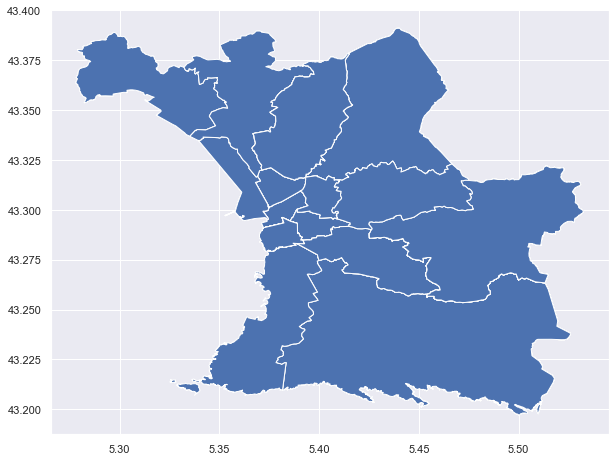

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))

jointure.plot(ax=ax)

plt.show()

### Les arrondissements de Marseille

Pour le dessin attention à l'ordre. Si vous dessinez les points en premier, les arrondissements vont les cacher.

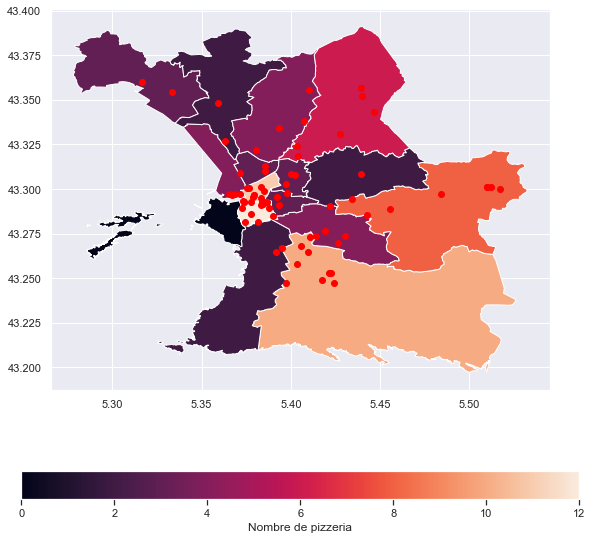

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))


geo_arrondissements.plot(column='nombre', 
                         legend=True,
                         legend_kwds={'label': "Nombre de pizzeria", 'orientation': "horizontal"},
                         ax=ax)
geo_pizzerias.plot(ax=ax, color="red")

plt.show()

**Ressources** :

* la france en geojson : https://github.com/gregoiredavid/france-geojson
* https://www.data.gouv.fr/fr/datasets/geozones/
* https://medium.com/@h4k1m0u/plot-a-geojson-map-using-geopandas-be89e7a0b93b

# chemins

**TBD**

On veut calculer le chemin entre 2 point sur le réseau routier sous jacent à la carte

tuto https://towardsdatascience.com/retrieving-openstreetmap-data-in-python-1777a4be45bb

## routes avec osm


# tutos 

Une liste de références, tutos et autre sans ordre particulier.

* un exemple de cartographie : https://makina-corpus.com/blog/metier/2019/python-carto
* de jolis exemples de cartes : https://examples.pyviz.org/#
* les tutos de ce gars là sont super bien : https://towardsdatascience.com/@shakasom (supprimez les cookies pour voir tous les tutos)
* les données cartographiques (très détaillé) : https://automating-gis-processes.github.io/CSC18/index.html
* des tutos geopandas par le développeur (du lourd) : https://github.com/jorisvandenbossche/geopandas-tutorial
* tutos sur openstreetmap (très bien fait) : 
    * https://towardsdatascience.com/retrieving-openstreetmap-data-in-python-1777a4be45bb
    * https://towardsdatascience.com/loading-data-from-openstreetmap-with-python-and-the-overpass-api-513882a27fd0
* je l'ai pas fait donc je sais pas si c'est bien : 
    * https://www.datacamp.com/community/tutorials/geospatial-data-python
    * https://geohackweek.github.io/vector/

# autres trucs (en vrac)


* https://scitools.org.uk/cartopy/docs/latest/crs/projections.html
* https://www.data-to-viz.com/graph/choropleth.html
* https://feed.terramonitor.com/shapefile-vs-geopackage-vs-geojson/
* https://shapely.readthedocs.io/en/latest/
* https://blog.algorexhealth.com/2018/04/everything-you-never-wanted-to-know-about-geographic-charting/
* https://medium.com/cr%C3%A9ation-dune-app-cartographique-avec-firebase-vue/comprendre-les-coordinates-reference-system-crs-b67a88bce63c
* https://xkcd.com/977/
* bibliothèques : 
    * https://github.com/gboeing/osmnx
    * https://wiki.openstreetmap.org/wiki/Overpass_API